In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Read your csv files as DataFrame
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
# Try getting column labels
df.columns, df.columns.shape

(Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
        'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
        'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
       dtype='object'),
 (29,))

In [4]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [5]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Check mean, median, quartile, etc.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
df.head(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0


In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

Attributes

*People*

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

*Products*

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

*Promotion*

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 - otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

*Place*

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### Check Certain Datatypes and The Correlations

In [10]:
float_data = df.select_dtypes(include = 'float64')
int_data = df.select_dtypes(include = 'int64')

In [11]:
numerical_data = df.select_dtypes(include = 'number')

In [12]:
categorical_data = df.select_dtypes(include = 'object')

In [13]:
numerical_data.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


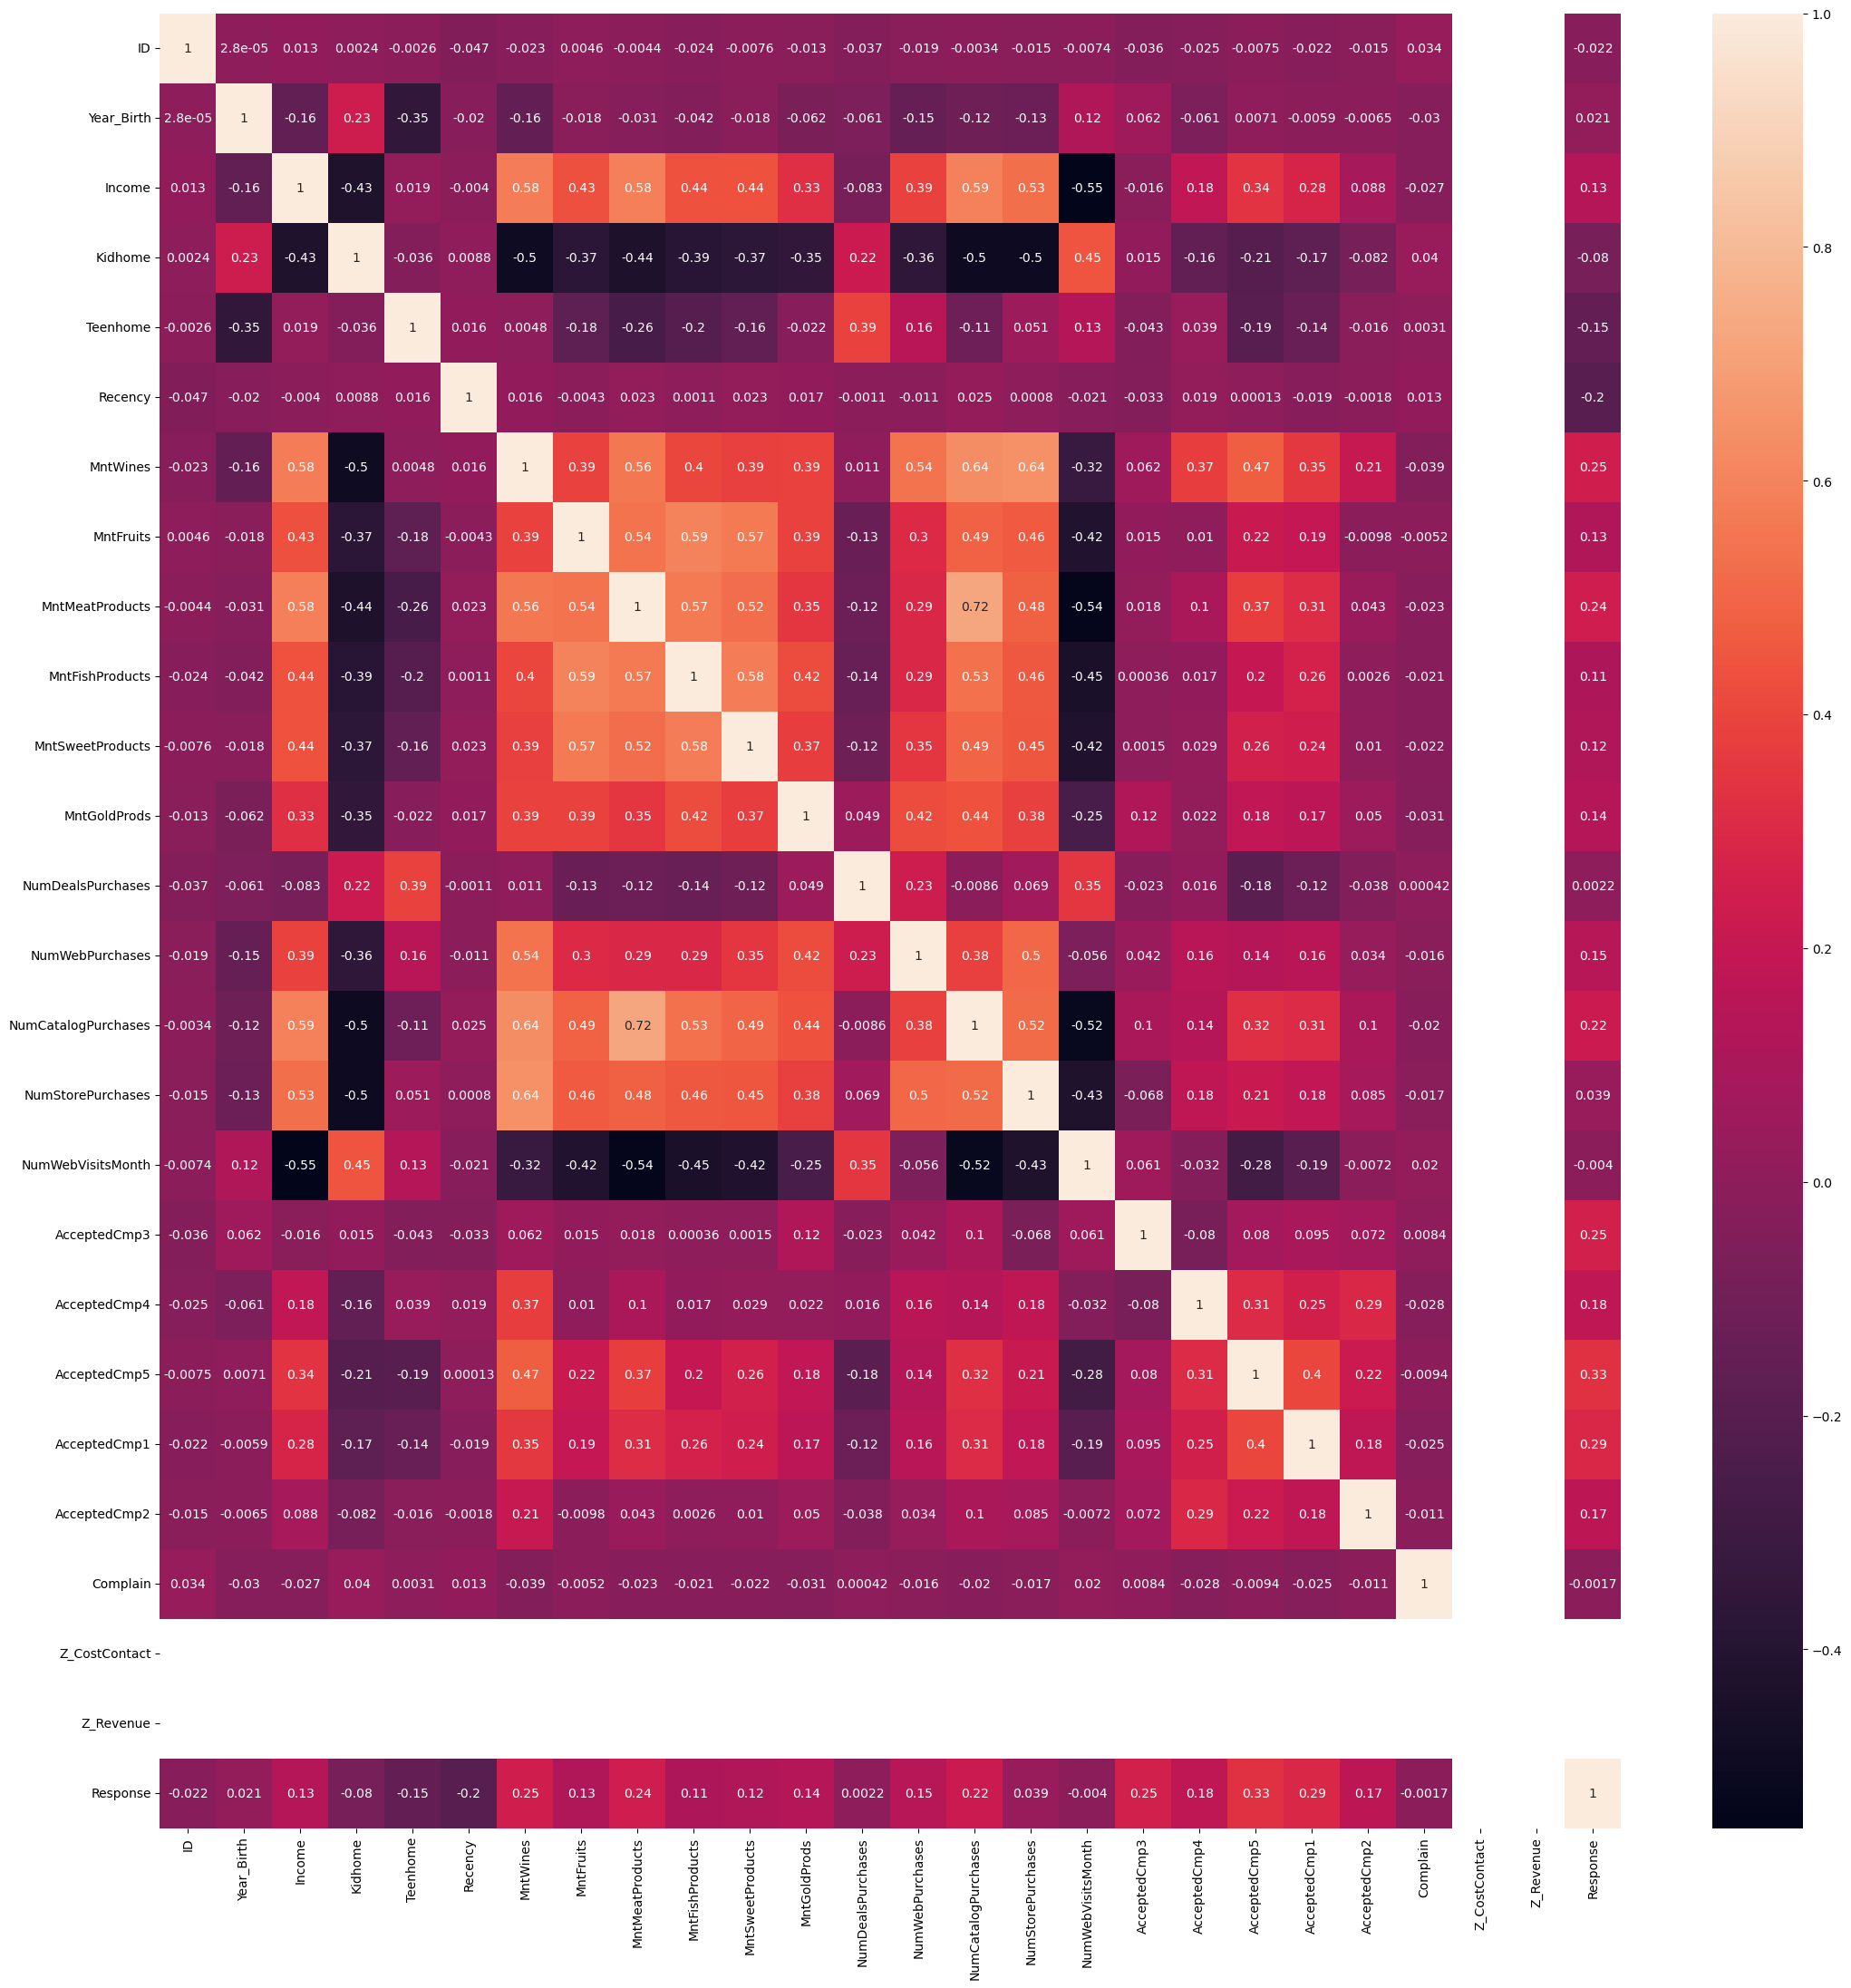

In [14]:
plt.figure(figsize=(26,26))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

### Make a Hypothesis

**"Numerical hypothesis"**
- Is there any relation between customer's income and how much wine they spent? The correlation is 0.58 according to the heatmap.
- Is there any relation between customer's purchase via catalogue and the amount of meat they spent the last two years? the correlation is 0.72 according to heat map. It's pretty high.
- The relation between monthly website visit and meat purchase in the last two years is in opposition. The correlation is -0.54.
- The relation between income and number of store purchase is 0.53 in correlation.
- The relation between wine and number of store purchase is 0.64 in correlation.
- The correlation between kidhome and income is negative -0.42
- The correlation between teenhome and income is barely positive ~0.01

In [15]:
# code something ~

**"Categorical hypothesis"**
- Is there any relation between income and education level of customer?
- Is there any relation between income and marital status of customer?
- Is there any relation between wine purchase and marital status of customer?
- Is there any relation between wine purchase and educational level of customer?

In [16]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [17]:
print(df['Education'].unique())
print(df['Education'].value_counts())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [18]:
df.select_dtypes(include='object').columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [19]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [20]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [21]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [22]:
# median is 51381.5 for income
# replace the damn missing values with median
medians = df['Income'].median()
df['Income'] = df['Income'].fillna(medians)
# or df.fillna({'Income': medians}, inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Getting Income Dist Based on Education Level

In [23]:
df.groupby(['Education'])['Income'].describe().T

Education,2n Cycle,Basic,Graduation,Master,PhD
count,203.000000,54.000000,1127.000000,370.000000,486.000000
mean,47688.583744,20306.259259,52707.305679,52896.777027,56096.303498
std,21958.898270,6235.066773,28039.531293,20021.539473,20512.097287
min,7500.000000,7500.000000,1730.000000,6560.000000,4023.000000
25%,28095.000000,15405.250000,34925.500000,37853.750000,40654.250000
50%,46891.000000,20744.000000,51651.000000,51044.500000,55005.000000
75%,65100.500000,24882.000000,69737.000000,66596.000000,69084.000000
max,96547.000000,34445.000000,666666.000000,157733.000000,162397.000000


### Shapiro-Wilk Test for Normal Distribution

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Education Level: Graduation 
Skewness: 0.15
Shapiro-Wilk statistic test = 0.97009, p-value = 0.00026
=> Probably not normal distribution

Education Level: PhD 
Skewness: 0.15
Shapiro-Wilk statistic test = 0.97009, p-value = 0.00026
=> Probably not normal distribution

Education Level: Master 
Skewness: 0.15
Shapiro-Wilk statistic test = 0.97009, p-value = 0.00026
=> Probably not normal distribution

Education Level: Basic 
Skewness: 0.15
Shapiro-Wilk statistic test = 0.97009, p-value = 0.00026
=> Probably not normal distribution

Education Level: 2n Cycle 
Skewness: 0.15
Shapiro-Wilk statistic test = 0.97009, p-value = 0.00026
=> Probably not normal distribution


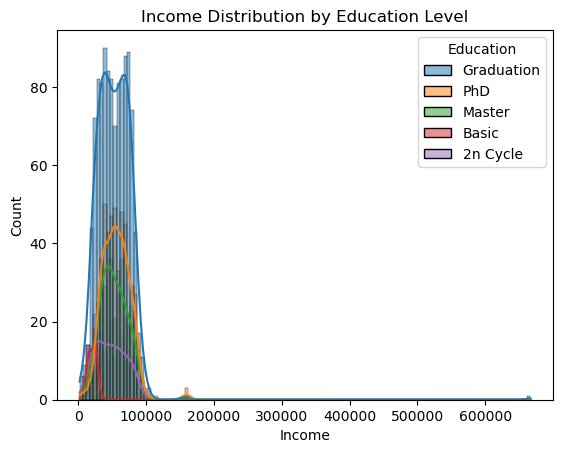

In [53]:
# OPTIONAL: Preview unique values in education
print(df['Education'].value_counts())

# Drop missing values from relevant columns
df = df[['Education', 'Income']].dropna()

# Loop through each education level and test income distribution
for edulabel in df['Education'].unique():
    income_data = df[df['Education'] == edu]['Income']
    
    print(f'\nEducation Level: {edulabel} ')
    print(f'Skewness: {income_data.skew():.2f}')
    
    stat, p = stats.shapiro(income_data)
    print(f'Shapiro-Wilk statistic test = {stat:.5f}, p-value = {p:.5f}')
    if p <= 0.05:
        print("=> Probably not normal distribution")
    else:
        print("=> Probably normal distribution")

# Optional: Visualize income distribution per education
sns.histplot(data=df, x='Income', hue='Education', kde=True)
plt.title('Income Distribution by Education Level')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

__Shapiro-Wilk Test Result__

*for those with phd and masters education, p-value is 0 & 0.0002 < 0.05, such the distribution is not normal*

*for basic education, p-value is 0.2 > 0.05, such that the distribution is normal*

### Kruskal-Wallis non parametric testing

We're comparing more than 2 groups of independent data, so clearly independent T-Test is out of question. ANOVA is also out of question since the data distributions are mostly not normal according to Shapiro-Wilk test. The only thing that fits the bill is Kruskal-Wallis testing

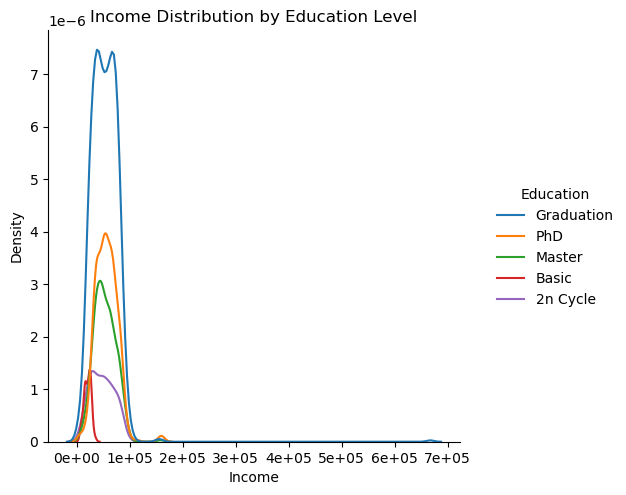

In [56]:
import matplotlib.ticker as ticker
sns.displot(data=df, x='Income', hue='Education', kind='kde')
plt.title('Income Distribution by Education Level')
plt.xlabel('Income')
plt.ylabel('Density')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0e}'))
plt.show()

In [63]:
# Prepare income lists per education group
# grouped_incomes = [df[df['Education'] == level]['Income'] for level in df['Education'].unique()]
grouped_incomes = df.groupby("Education")["Income"].apply(list)
# Run Kruskal-Wallis H-test
stat, p = stats.kruskal(*grouped_incomes)
print(f'Kruskal-Wallis statistical test = {stat:.4f}, p-value = {p:.6f}')

if p < 0.05:
    print(f"Conclusion since p = {p:.6f} < 0.05: There is significant differences in income across education levels")
else:
    print(f"Conclusion since p = {p:.6f} >= 0.05: No significant differences in income across education levels")

df.groupby('Education')['Income'].describe().T

Kruskal-Wallis statistical test = 142.5176, p-value = 0.000000
Conclusion since p = 0.000000 < 0.05: There is significant differences in income across education levels


Education,2n Cycle,Basic,Graduation,Master,PhD
count,203.000000,54.000000,1127.000000,370.000000,486.000000
mean,47688.583744,20306.259259,52707.305679,52896.777027,56096.303498
std,21958.898270,6235.066773,28039.531293,20021.539473,20512.097287
min,7500.000000,7500.000000,1730.000000,6560.000000,4023.000000
25%,28095.000000,15405.250000,34925.500000,37853.750000,40654.250000
50%,46891.000000,20744.000000,51651.000000,51044.500000,55005.000000
75%,65100.500000,24882.000000,69737.000000,66596.000000,69084.000000
max,96547.000000,34445.000000,666666.000000,157733.000000,162397.000000


Kruskal-Wallis test statistic = 142.52
That result is very large, especially when comparing 5 groups of Education levels, with a very small p-value (p < 0.000001),
So the differences in income distributions across education levels are strong and statistically significant.

In [64]:
print(df.groupby('Education')['Income'].median().sort_values())

Education
Basic         20744.0
2n Cycle      46891.0
Master        51044.5
Graduation    51651.0
PhD           55005.0
Name: Income, dtype: float64


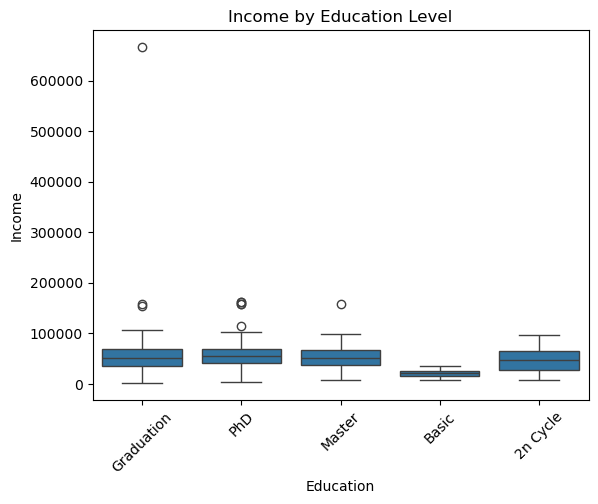

In [65]:
sns.boxplot(data=df, x='Education', y='Income')
plt.title('Income by Education Level')
plt.xticks(rotation=45)
plt.show()

Median Income:

Individuals with Graduation, PhD, and Master degrees have similar and relatively higher median incomes.

The Basic education group has the lowest median income.

The 2n Cycle group shows a median slightly lower than Graduation and PhD, but higher than Basic.

Spread of Income (IQR):

Graduation, PhD, Master, and 2n Cycle have wider interquartile ranges (IQR), indicating greater variability in income.

The Basic education group has a narrower IQR, suggesting more uniform (but lower) income.

Outliers:

All groups except Basic show high-income outliers.

The Graduation group has an extreme outlier above 600,000, which may skew the mean upward.

This indicates that higher education might occasionally lead to very high earnings, even if it's not the norm.

Skewness:

The presence of outliers and longer whiskers on the upper side suggests positive (right) skewness, especially in the higher education levels.